# Implement Linear Spatial Filtering using Built-in and user defined functions

In [89]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [90]:
!curl -o NineOneOne.jpg https://cdni.autocarindia.com/ExtraImages/20210624030226_Porsche_GTS_1.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:19 --:--:--     0 0curl: (6) Could not resolve host: cdni.autocarindia.com


In [91]:
image = plt.imread("NineOneOne.jpg")

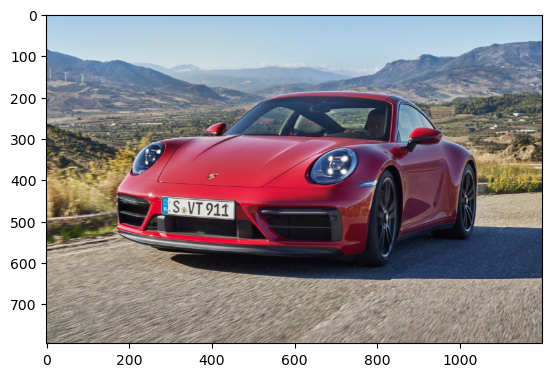

In [92]:
plt.imshow(image)

noisy image

In [93]:
def add_gaussian_noise(image, mean=0, sigma=25):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(image)

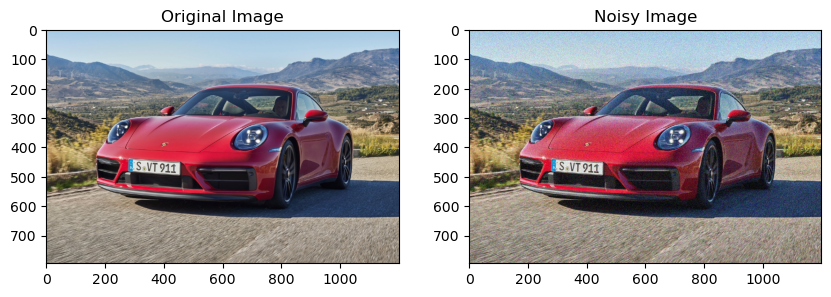

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(noisy_image)
ax[1].set_title('Noisy Image')
plt.show()

Average Filter

In [95]:
kernel_size = (5, 5)  # Adjust this size as needed

# Perform average filtering
averaged_image = cv2.blur(image, kernel_size)

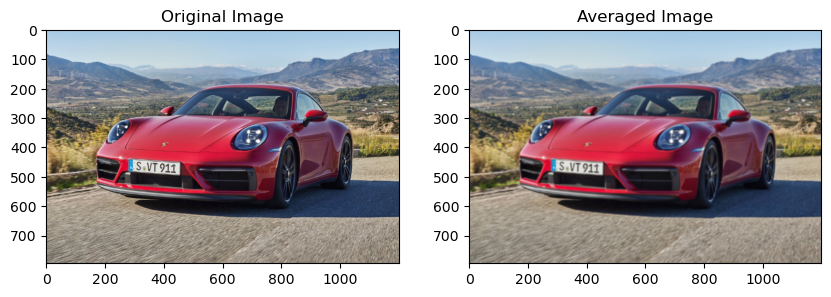

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(averaged_image)
ax[1].set_title('Averaged Image')
plt.show()

Gaussian Blur

In [97]:
# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # You can adjust the kernel size (e.g., (5, 5)) and standard deviation (e.g., 0) as needed

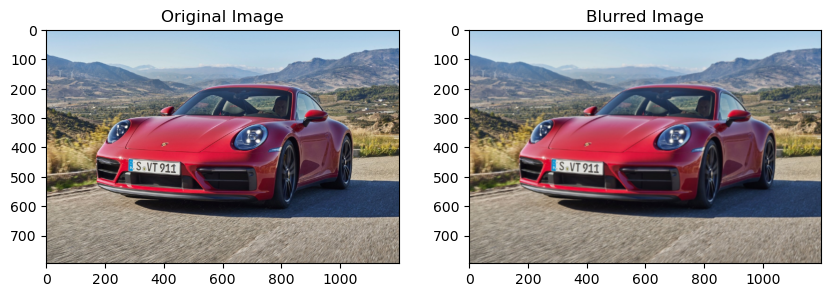

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(blurred_image)
ax[1].set_title('Blurred Image')
plt.show()

Sharpening Filtering

In [99]:
# Define the sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

# Apply the sharpening kernel to the image
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

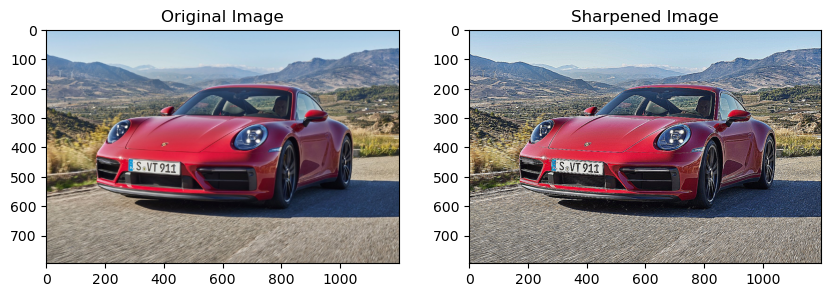

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(sharpened_image)
ax[1].set_title('Sharpened Image')
plt.show()

User defined function

In [101]:
!curl -o GT3RS.jpg https://images.drive.com.au/driveau/image/upload/c_fill,f_auto,g_auto,h_675,q_auto:good,w_1200/cms/uploads/njfd6ngjhqsjou9ijho6

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:19 --:--:--     0curl: (6) Could not resolve host: images.drive.com.au


In [102]:

img = plt.imread('GT3RS.jpg')

def add_gaussian_noise(image, mean=0, sigma=25):
    row, col, ch = img.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = img + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

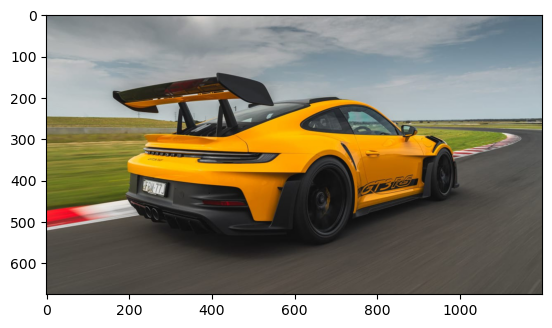

In [103]:
plt.imshow(img)

Average Filter

In [104]:

def average_filter(img, kernel_size=3):
    row, col, ch = img.shape
    filtered_img = np.zeros((row, col, ch), dtype=np.uint8)
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    for i in range(pad_size, row + pad_size):
        for j in range(pad_size, col + pad_size):
            roi = padded_image[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            filtered_img[i-pad_size, j-pad_size] = np.mean(roi, axis=(0, 1))
    return filtered_img

In [105]:
noisy_image = add_gaussian_noise(img)
filtered_img = average_filter(noisy_image)

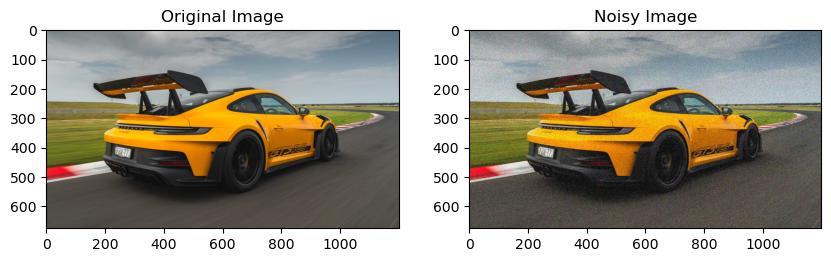

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(noisy_image)
ax[1].set_title('Noisy Image')
plt.show()

Gaussian Blur

In [107]:
def gaussian_blur(img, kernel_size=20, sigma=0):
    row, col, ch = img.shape
    filtered_img = np.zeros((row, col, ch), dtype=np.uint8)
    pad_size = kernel_size // 2
    padded_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    kernel = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - pad_size
            y = j - pad_size
            kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    kernel /= np.sum(kernel)
    for i in range(pad_size, row + pad_size):
        for j in range(pad_size, col + pad_size):
            roi = padded_img[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1, :]
            for c in range(ch):
                filtered_img[i-pad_size, j-pad_size, c] = np.sum(roi[:,:,c] * kernel)
    return filtered_img

In [108]:
gaussian_blurred_img = gaussian_blur(img, kernel_size=5, sigma=1)

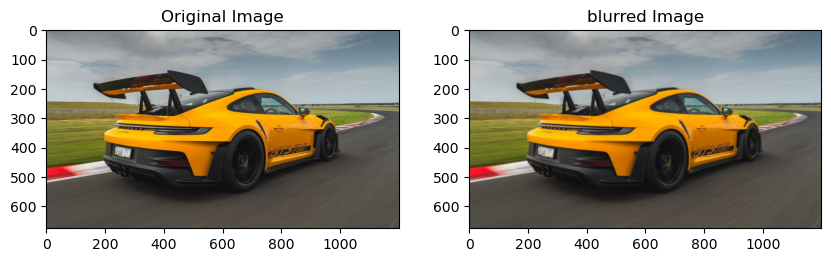

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(gaussian_blurred_img)
ax[1].set_title('blurred Image')
plt.show()

Sharpening Filtering

In [110]:
def sharpening_filter(img):
    row, col = img.shape[:2]
    filtered_img = np.zeros_like(img, dtype=np.float32)
    pad_size = 1
    padded_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
    for i in range(pad_size, row + pad_size):
        for j in range(pad_size, col + pad_size):
            roi = padded_img[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            for c in range(img.shape[2]):
                filtered_img[i-pad_size, j-pad_size, c] = np.sum(roi[:,:,c] * kernel)
    return np.clip(filtered_img, 0, 255).astype(np.uint8)

In [111]:
sharp_filter_img = sharpening_filter(img)

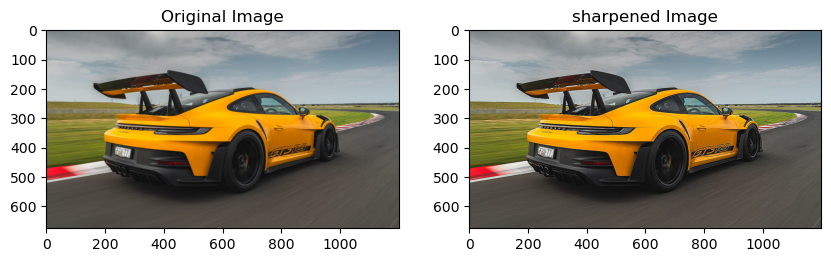

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(sharp_filter_img)
ax[1].set_title('sharpened Image')
plt.show()